In [1]:
import numpy as np
import scipy as sp
import scipy.sparse as sparse
import random as rd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time
from IPython.display import clear_output
from scipy.integrate import *

In [2]:
n=3
h=720

In [3]:
X=np.random.rand(1,n)*60000000000
Y=np.random.rand(1,n)*60000000000
DX=(np.random.rand(1,n)-0.5)*40000
DY=(np.random.rand(1,n)-0.5)*40000

In [4]:
M=np.random.rand(1,n)
Mr=M.round(0)
M=M.astype(object, copy=False)
Mr=Mr.astype(object, copy=False)
#M=M*(10**24)+Mr*((10**26)*np.random.rand())
M=M*(10**24)
M[0][0]=1.988e30
DX[0][0]=0
DY[0][0]=0

In [5]:
def force(MM,X,Y):
    G=6.674e-11
    D=(X-X.transpose())**2+(Y-Y.transpose())**2
    return np.multiply(G*(MM/(D+0.00001)),np.where(np.identity(n), 0, 1))
def force_sum(force):
    return np.sum(force,1)
def vec_to_angle(X,Y):
    Xd=X-X.transpose()
    Yd=Y-Y.transpose()
    return np.arctan2(Yd,Xd+0.00001)
def angle_to_vec_stuff(ang,hyp):
    X=np.multiply(np.cos(ang),hyp)
    Y=np.multiply(np.sin(ang),hyp)
    return X,Y
def f_to_a(f,M):
    return np.divide(f,M)

In [6]:
def get_acc(X,Y,M):
    MM=M*np.transpose(M)
    ang=vec_to_angle(X,Y)
    FORCE=force(MM,X,Y)
    Xf,Yf=angle_to_vec_stuff(ang,FORCE)
    Xf=force_sum(Xf)
    Yf=force_sum(Yf)
    Xa=f_to_a(Xf,M)
    Ya=f_to_a(Yf,M)
    return Xa,Ya
def new_v(h,DX,DY,DX2,DY2):
    DX=DX+h*DX2
    DY=DY+h*DY2
def extract(y,n):
    X=(y[0:n]).reshape(1,n)
    Y=(y[n:2*n]).reshape(1,n)
    DX=(y[2*n:3*n]).reshape(1,n)
    DY=(y[3*n:4*n]).reshape(1,n)
    M=(y[4*n:5*n]).reshape(1,n)
    return X,Y,DX,DY,M

In [7]:
y0=[X,Y,DX,DY,M]
y0=np.concatenate(y0).ravel()
t0=0
def f(t,y,n=n):
    X,Y,DX,DY,M=extract(y,n);
    Xa,Ya=get_acc(X,Y,M)
    DX=DX+Xa
    DY=DY+Ya
    X=X+DX
    Y=Y+DY
    ans=[DX,DY,Xa,Ya,np.zeros(M.shape)]
    ans=np.concatenate(ans).ravel()
    return ans
def fr(y,t,n):
    return f(t,y,n)
def euler(f,t0,y0,n):
    pass

In [8]:
r = ode(f).set_integrator('vode', method='bdf',atol=0.5,nsteps=750)
r.set_initial_value(y0,t0).set_f_params(n)
ans=r.integrate(r.t+h)
#X,Y,_,_,_=extract(ans,n)
all_out=[extract(ans,n)]


d:\python37\lib\site-packages\scipy\integrate\_ode.py:1009: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  self.messages.get(istate, unexpected_istate_msg)))


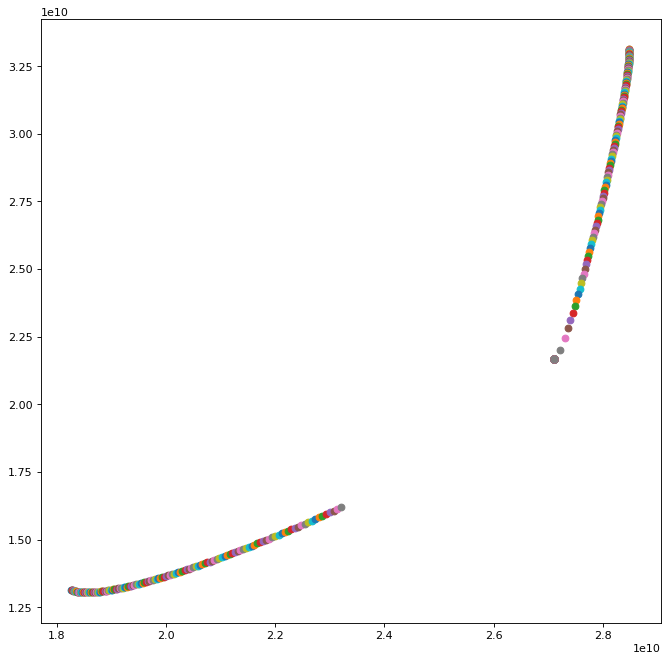

In [9]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')


scat=plt.scatter(X, Y)
plt.draw()

for i in range(0,int(2600000/h)):
    if not r.successful():
        break;
    ans=r.integrate(r.t+h)
    all_out+=[extract(ans,n)]
    plt.scatter(all_out[i][0], all_out[i][1])


In [10]:
i

147

In [11]:
X

array([[2.71071579e+10, 1.82708232e+10, 2.84798953e+10]])

In [12]:
Y

array([[2.16649499e+10, 1.31532253e+10, 3.31323946e+10]])

In [13]:
M

array([[1.988e+30, 2.2993676320139822e+23, 6.285575650761055e+23]],
      dtype=object)